The Balanced Bagging Classifier is a variant of the Bagging Classifier, which is an ensemble method that trains multiple classifiers on different subsets of the training data and combines their predictions. The Balanced Bagging Classifier, in addition to this, addresses the problem of imbalanced data by using random under sampling to balance the class distribution in each subset. This helps to reduce the bias towards the majority class and improve the performance on the minority class.

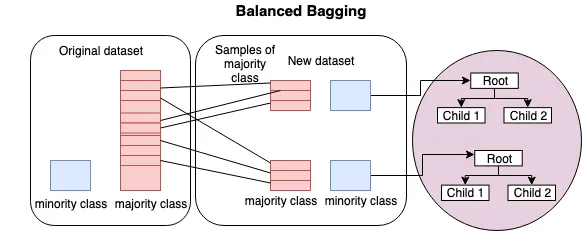 

In this example, we’ll use the Credit Card Fraud Detection dataset, which is a binary classification problem with highly imbalanced classes.


In [15]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn


import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.ensemble import BalancedBaggingClassifier

data = pd.read_csv('creditcard.csv')
X = data.drop(['Class'], axis=1)
y = data['Class']

Next, let’s split the data into training and testing sets:


In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

Now, let’s create the Balanced Bagging Classifier with Decision Tree as the base estimator:


Here, we’re using the Decision Tree classifier as the base estimator, and ‘auto’ as the sampling_strategy, which means that the minority class will be oversampled to match the majority class and the majority class will be undersampled to match the minority class. We’re also setting replacement to False, which means that the sampling will be done without replacement.

In [6]:
base_estimator = DecisionTreeClassifier()
bbc = BalancedBaggingClassifier(
    estimator=base_estimator, 
    sampling_strategy='auto', 
    replacement=False, 
    random_state=42
)

Next, let’s fit the model on the training data, make predictions on the test data, and evaluate the performance of the model:

In [7]:
bbc.fit(X_train, y_train)

y_pred = bbc.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[83375  1932]
 [   10   126]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85307
           1       0.06      0.93      0.11       136

    accuracy                           0.98     85443
   macro avg       0.53      0.95      0.55     85443
weighted avg       1.00      0.98      0.99     85443



Note: There are several other algorithms that are similar to Balanced Bagging Classifier in terms of their application for anomaly detection. Here are some examples

1. Local Outlier Factor (LOF): LOF is another unsupervised learning algorithm that detects outliers by measuring the local density of instances relative to their neighbors. Anomalies are instances that have a significantly lower density than their neighbors.


2. Angle-Based Outlier Detection (ABOD): ABOD is another unsupervised learning algorithm that detects outliers by measuring the angles between instances. Anomalies are instances that have significantly different angles than their neighbors.


3. Mahalanobis Distance: Mahalanobis distance is a distance metric that measures the distance between a point and a distribution. Anomalies are instances that have a significantly large Mahalanobis distance from the distribution.


4. Minimum Covariance Determinant (MCD): MCD is a robust estimator of the covariance matrix of a dataset. It can be used to identify outliers by measuring the Mahalanobis distance of each instance from the estimated distribution.


5. Support Vector Data Description (SVDD): SVDD is a supervised learning algorithm that learns a hypersphere around the normal instances and identifies anomalies as instances that fall outside the hypersphere.


6. Autoencoder-based approaches: Autoencoders are a type of neural network that learns to reconstruct the input data. Anomalies are identified as instances that cannot be reconstructed accurately.


Balance Bagging Classifier is a specialized ensemble learning algorithm that is specifically designed to address the problem of imbalanced classification. It combines the power of bagging with resampling techniques to achieve a better balance between the minority and majority classes. Compared to the other techniques mentioned earlier, Balance Bagging Classifier has the following advantages:

It is an ensemble method that combines multiple classifiers, which makes it more robust and less prone to overfitting.
It uses resampling techniques to balance the class distribution, which can improve the performance of the classifiers.
It is flexible and can be used with any type of base classifier, which allows for a wide range of applications.
It can handle both binary and multiclass classification problems.
However, Balance Bagging Classifier also has some limitations. One limitation is that it requires a sufficient number of minority class samples to be effective. If the number of minority class samples is too small, the resampling techniques may not be able to generate enough diverse samples to train the classifiers.

Compared to the other techniques mentioned earlier, Balance Bagging Classifier is generally more effective in dealing with severe class imbalance, where the minority class is significantly smaller than the majority class. It can also handle datasets with a large number of features and instances.

However, the choice of technique ultimately depends on the specific problem at hand and the nature of the data. It is important to carefully evaluate the performance of different techniques and choose the one that works best for the specific application.



---
---
---
# OTHER EXAMPLE

Hello hi hey there, once again we meet with another topic of “how to handle imbalanced datasets” In our previous discussion we performed various ways like Smote, CNN, OSS, NCR, ENN Tomeklinks, and many more. This time we will look for default sklearn features that can handle imbalanced datasets with ease.

One of them is Balanced Bagging Classifier. just like our regular bagging classifier that builds several estimators on different random subsets of data, our regular bagging classifiers don't allow us to balance each subset of data. Therefore when we train our model on an imbalanced dataset our regular bagging classifiers will favor the majority classes.

Let’s run a comparison of both

1. Bagging Classifier

In [10]:
from sklearn.datasets import make_classification
#create a dataset
X, y = make_classification(n_samples=10000, n_features=2, n_informative=2,n_redundant=0, n_repeated=0, n_classes=3, n_clusters_per_class=1,weights=[0.01, 0.05, 0.94], class_sep=0.8, random_state=0)
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

bc = BaggingClassifier(estimator=DecisionTreeClassifier(), random_state=0)
bc.fit(X_train, y_train)

y_pred = bc.predict(X_test)
print("Accuracy",balanced_accuracy_score(y_test, y_pred))
#Accuracy 0.7739

Accuracy 0.7739629664028289


2. Now let's try with our new BalancedBaggingClassifier()

In [11]:
from imblearn.ensemble import BalancedBaggingClassifier

bbc = BalancedBaggingClassifier(
    estimator=DecisionTreeClassifier(), 
    sampling_strategy='auto',  
    replacement=False,
    random_state=0
)

bbc.fit(X_train, y_train)
y_pred = bbc.predict(X_test)
print("Accuracy",balanced_accuracy_score(y_test, y_pred))
#Accuracy 0.8

Accuracy 0.8251353587264241


3. BalancedRandomForestClassifier is another ensemble method in which the tree of the forest will be provided with a balanced bootstrap sample.

In [17]:
from imblearn.ensemble import BalancedRandomForestClassifier

brf = BalancedRandomForestClassifier(
    n_estimators=100, 
    random_state=0
)

brf.fit(X_train, y_train)

y_pred = brf.predict(X_test)
print("Accuracy",balanced_accuracy_score(y_test, y_pred))

#Accuracy 0.8

Accuracy 0.8102589703105166


---
Bonus: 4.) SMOTE-NC

In [18]:
from imblearn.over_sampling import SMOTENC

cat_indx =[0,1]

sm = SMOTENC(
    categorical_features=cat_indx, 
    random_state=0
)

X_train_res, y_train_res = sm.fit_resample(X_train, y_train)


ValueError: SMOTE-NC is not designed to work only with categorical features. It requires some numerical features.